In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import json

In [2]:
by_boro = pd.read_csv("https://raw.githubusercontent.com/nychealth/coronavirus-data/master/totals/group-data-by-boro.csv")

In [3]:
by_boro

,group,subgroup,BK_CASE_COUNT,BK_HOSPITALIZED_COUNT,BK_DEATH_COUNT,BK_CASE_RATE,BK_HOSPITALIZED_RATE,BK_DEATH_RATE,BX_CASE_COUNT,BX_HOSPITALIZED_COUNT,...,QN_DEATH_COUNT,QN_CASE_RATE,QN_HOSPITALIZED_RATE,QN_DEATH_RATE,SI_CASE_COUNT,SI_HOSPITALIZED_COUNT,SI_DEATH_COUNT,SI_CASE_RATE,SI_HOSPITALIZED_RATE,SI_DEATH_RATE
0,Boroughwide,Boroughwide,229489.0,31641.0,8508.0,8964.75,1236.02,332.36,150020.0,22775.0,...,8509.0,10080.85,1421.12,377.53,61843.0,5846.0,1598.0,12988.32,1227.78,335.61
1,Age,0-4,5904.0,257.0,NaN,3227.53,140.49,NaN,3591.0,177.0,...,NaN,3502.68,118.17,NaN,1462.0,33.0,NaN,5344.74,120.64,NaN
2,Age,5-12,12933.0,155.0,NaN,5132.64,61.51,NaN,8027.0,102.0,...,NaN,5394.07,45.94,NaN,3559.0,18.0,NaN,7778.40,39.34,NaN
3,Age,13-17,9577.0,159.0,NaN,6832.82,113.44,NaN,5810.0,129.0,...,NaN,7111.99,112.38,NaN,3246.0,35.0,NaN,10868.54,117.19,NaN
4,Age,0-17,NaN,NaN,9.0,NaN,NaN,1.57,NaN,NaN,...,5.0,NaN,NaN,1.12,NaN,NaN,2.0,NaN,NaN,1.94
5,Age,18-24,21037.0,819.0,21.0,10122.32,394.08,10.10,13603.0,645.0,...,7.0,11338.84,339.76,4.07,6702.0,118.0,6.0,16893.50,297.44,15.12
6,Age,25-34,43045.0,2175.0,80.0,9157.71,462.73,17.02,26574.0,1649.0,...,75.0,11226.74,594.70,20.85,10611.0,313.0,12.0,16395.49,483.63,18.54
7,Age,35-44,35556.0,2509.0,175.0,9932.23,700.87,48.88,23335.0,2002.0,...,234.0,12165.78,934.05,76.42,9425.0,464.0,33.0,15927.60,784.13,55.77
8,Age,45-54,31488.0,3495.0,528.0,10660.67,1183.28,178.76,23662.0,3046.0,...,537.0,12362.59,1434.49,179.48,9719.0,770.0,94.0,15145.23,1199.90,146.48
9,Age,55-64,31160.0,5913.0,1231.0,10905.21,2069.40,430.82,22401.0,4709.0,...,1438.0,11530.35,2265.80,478.59,8832.0,1170.0,196.0,13355.51,1769.24,296.39


In [4]:
by_boro.drop([12,13,14,15,16,17], inplace=True)

In [5]:
by_boro

,group,subgroup,BK_CASE_COUNT,BK_HOSPITALIZED_COUNT,BK_DEATH_COUNT,BK_CASE_RATE,BK_HOSPITALIZED_RATE,BK_DEATH_RATE,BX_CASE_COUNT,BX_HOSPITALIZED_COUNT,...,QN_DEATH_COUNT,QN_CASE_RATE,QN_HOSPITALIZED_RATE,QN_DEATH_RATE,SI_CASE_COUNT,SI_HOSPITALIZED_COUNT,SI_DEATH_COUNT,SI_CASE_RATE,SI_HOSPITALIZED_RATE,SI_DEATH_RATE
0,Boroughwide,Boroughwide,229489.0,31641.0,8508.0,8964.75,1236.02,332.36,150020.0,22775.0,...,8509.0,10080.85,1421.12,377.53,61843.0,5846.0,1598.0,12988.32,1227.78,335.61
1,Age,0-4,5904.0,257.0,NaN,3227.53,140.49,NaN,3591.0,177.0,...,NaN,3502.68,118.17,NaN,1462.0,33.0,NaN,5344.74,120.64,NaN
2,Age,5-12,12933.0,155.0,NaN,5132.64,61.51,NaN,8027.0,102.0,...,NaN,5394.07,45.94,NaN,3559.0,18.0,NaN,7778.40,39.34,NaN
3,Age,13-17,9577.0,159.0,NaN,6832.82,113.44,NaN,5810.0,129.0,...,NaN,7111.99,112.38,NaN,3246.0,35.0,NaN,10868.54,117.19,NaN
4,Age,0-17,NaN,NaN,9.0,NaN,NaN,1.57,NaN,NaN,...,5.0,NaN,NaN,1.12,NaN,NaN,2.0,NaN,NaN,1.94
5,Age,18-24,21037.0,819.0,21.0,10122.32,394.08,10.10,13603.0,645.0,...,7.0,11338.84,339.76,4.07,6702.0,118.0,6.0,16893.50,297.44,15.12
6,Age,25-34,43045.0,2175.0,80.0,9157.71,462.73,17.02,26574.0,1649.0,...,75.0,11226.74,594.70,20.85,10611.0,313.0,12.0,16395.49,483.63,18.54
7,Age,35-44,35556.0,2509.0,175.0,9932.23,700.87,48.88,23335.0,2002.0,...,234.0,12165.78,934.05,76.42,9425.0,464.0,33.0,15927.60,784.13,55.77
8,Age,45-54,31488.0,3495.0,528.0,10660.67,1183.28,178.76,23662.0,3046.0,...,537.0,12362.59,1434.49,179.48,9719.0,770.0,94.0,15145.23,1199.90,146.48
9,Age,55-64,31160.0,5913.0,1231.0,10905.21,2069.40,430.82,22401.0,4709.0,...,1438.0,11530.35,2265.80,478.59,8832.0,1170.0,196.0,13355.51,1769.24,296.39


In [6]:
by_boro.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12 entries, 0 to 11
Data columns (total 32 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   group                  12 non-null     object 
 1   subgroup               12 non-null     object 
 2   BK_CASE_COUNT          11 non-null     float64
 3   BK_HOSPITALIZED_COUNT  11 non-null     float64
 4   BK_DEATH_COUNT         9 non-null      float64
 5   BK_CASE_RATE           11 non-null     float64
 6   BK_HOSPITALIZED_RATE   11 non-null     float64
 7   BK_DEATH_RATE          9 non-null      float64
 8   BX_CASE_COUNT          11 non-null     float64
 9   BX_HOSPITALIZED_COUNT  11 non-null     float64
 10  BX_DEATH_COUNT         9 non-null      float64
 11  BX_CASE_RATE           11 non-null     float64
 12  BX_HOSPITALIZED_RATE   11 non-null     float64
 13  BX_DEATH_RATE          9 non-null      float64
 14  MN_CASE_COUNT          11 non-null     float64
 15  MN_HOSPI

In [7]:
by_boro = by_boro.fillna((by_boro[by_boro['group']=='Age'][:3].sum()))

In [8]:
by_boro

,group,subgroup,BK_CASE_COUNT,BK_HOSPITALIZED_COUNT,BK_DEATH_COUNT,BK_CASE_RATE,BK_HOSPITALIZED_RATE,BK_DEATH_RATE,BX_CASE_COUNT,BX_HOSPITALIZED_COUNT,...,QN_DEATH_COUNT,QN_CASE_RATE,QN_HOSPITALIZED_RATE,QN_DEATH_RATE,SI_CASE_COUNT,SI_HOSPITALIZED_COUNT,SI_DEATH_COUNT,SI_CASE_RATE,SI_HOSPITALIZED_RATE,SI_DEATH_RATE
0,Boroughwide,Boroughwide,229489.0,31641.0,8508.0,8964.75,1236.02,332.36,150020.0,22775.0,...,8509.0,10080.85,1421.12,377.53,61843.0,5846.0,1598.0,12988.32,1227.78,335.61
1,Age,0-4,5904.0,257.0,0.0,3227.53,140.49,0.00,3591.0,177.0,...,0.0,3502.68,118.17,0.00,1462.0,33.0,0.0,5344.74,120.64,0.00
2,Age,5-12,12933.0,155.0,0.0,5132.64,61.51,0.00,8027.0,102.0,...,0.0,5394.07,45.94,0.00,3559.0,18.0,0.0,7778.40,39.34,0.00
3,Age,13-17,9577.0,159.0,0.0,6832.82,113.44,0.00,5810.0,129.0,...,0.0,7111.99,112.38,0.00,3246.0,35.0,0.0,10868.54,117.19,0.00
4,Age,0-17,28414.0,571.0,9.0,15192.99,315.44,1.57,17428.0,408.0,...,5.0,16008.74,276.49,1.12,8267.0,86.0,2.0,23991.68,277.17,1.94
5,Age,18-24,21037.0,819.0,21.0,10122.32,394.08,10.10,13603.0,645.0,...,7.0,11338.84,339.76,4.07,6702.0,118.0,6.0,16893.50,297.44,15.12
6,Age,25-34,43045.0,2175.0,80.0,9157.71,462.73,17.02,26574.0,1649.0,...,75.0,11226.74,594.70,20.85,10611.0,313.0,12.0,16395.49,483.63,18.54
7,Age,35-44,35556.0,2509.0,175.0,9932.23,700.87,48.88,23335.0,2002.0,...,234.0,12165.78,934.05,76.42,9425.0,464.0,33.0,15927.60,784.13,55.77
8,Age,45-54,31488.0,3495.0,528.0,10660.67,1183.28,178.76,23662.0,3046.0,...,537.0,12362.59,1434.49,179.48,9719.0,770.0,94.0,15145.23,1199.90,146.48
9,Age,55-64,31160.0,5913.0,1231.0,10905.21,2069.40,430.82,22401.0,4709.0,...,1438.0,11530.35,2265.80,478.59,8832.0,1170.0,196.0,13355.51,1769.24,296.39


In [9]:
by_boro.drop([1,2,3],inplace=True)
by_boro

,group,subgroup,BK_CASE_COUNT,BK_HOSPITALIZED_COUNT,BK_DEATH_COUNT,BK_CASE_RATE,BK_HOSPITALIZED_RATE,BK_DEATH_RATE,BX_CASE_COUNT,BX_HOSPITALIZED_COUNT,...,QN_DEATH_COUNT,QN_CASE_RATE,QN_HOSPITALIZED_RATE,QN_DEATH_RATE,SI_CASE_COUNT,SI_HOSPITALIZED_COUNT,SI_DEATH_COUNT,SI_CASE_RATE,SI_HOSPITALIZED_RATE,SI_DEATH_RATE
0,Boroughwide,Boroughwide,229489.0,31641.0,8508.0,8964.75,1236.02,332.36,150020.0,22775.0,...,8509.0,10080.85,1421.12,377.53,61843.0,5846.0,1598.0,12988.32,1227.78,335.61
4,Age,0-17,28414.0,571.0,9.0,15192.99,315.44,1.57,17428.0,408.0,...,5.0,16008.74,276.49,1.12,8267.0,86.0,2.0,23991.68,277.17,1.94
5,Age,18-24,21037.0,819.0,21.0,10122.32,394.08,10.10,13603.0,645.0,...,7.0,11338.84,339.76,4.07,6702.0,118.0,6.0,16893.50,297.44,15.12
6,Age,25-34,43045.0,2175.0,80.0,9157.71,462.73,17.02,26574.0,1649.0,...,75.0,11226.74,594.70,20.85,10611.0,313.0,12.0,16395.49,483.63,18.54
7,Age,35-44,35556.0,2509.0,175.0,9932.23,700.87,48.88,23335.0,2002.0,...,234.0,12165.78,934.05,76.42,9425.0,464.0,33.0,15927.60,784.13,55.77
8,Age,45-54,31488.0,3495.0,528.0,10660.67,1183.28,178.76,23662.0,3046.0,...,537.0,12362.59,1434.49,179.48,9719.0,770.0,94.0,15145.23,1199.90,146.48
9,Age,55-64,31160.0,5913.0,1231.0,10905.21,2069.40,430.82,22401.0,4709.0,...,1438.0,11530.35,2265.80,478.59,8832.0,1170.0,196.0,13355.51,1769.24,296.39
10,Age,65-74,21525.0,6981.0,2121.0,10238.15,3320.44,1008.83,12946.0,4877.0,...,2111.0,9496.87,3210.04,1015.49,4709.0,1260.0,380.0,10092.37,2700.44,814.42
11,Age,75+,17068.0,9178.0,4343.0,10827.13,5822.09,2754.99,9868.0,5435.0,...,4102.0,9355.95,5167.21,2556.50,3558.0,1665.0,875.0,10900.07,5100.79,2680.60


In [10]:
by_boro.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9 entries, 0 to 11
Data columns (total 32 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   group                  9 non-null      object 
 1   subgroup               9 non-null      object 
 2   BK_CASE_COUNT          9 non-null      float64
 3   BK_HOSPITALIZED_COUNT  9 non-null      float64
 4   BK_DEATH_COUNT         9 non-null      float64
 5   BK_CASE_RATE           9 non-null      float64
 6   BK_HOSPITALIZED_RATE   9 non-null      float64
 7   BK_DEATH_RATE          9 non-null      float64
 8   BX_CASE_COUNT          9 non-null      float64
 9   BX_HOSPITALIZED_COUNT  9 non-null      float64
 10  BX_DEATH_COUNT         9 non-null      float64
 11  BX_CASE_RATE           9 non-null      float64
 12  BX_HOSPITALIZED_RATE   9 non-null      float64
 13  BX_DEATH_RATE          9 non-null      float64
 14  MN_CASE_COUNT          9 non-null      float64
 15  MN_HOSPIT

In [11]:
for col in by_boro.columns:
    if "RATE" in col or "HOSPITALIZED_COUNT" in col:
        by_boro = by_boro.drop(col, axis=1)

In [12]:
by_boro.drop([0],inplace=True)
by_boro

,group,subgroup,BK_CASE_COUNT,BK_DEATH_COUNT,BX_CASE_COUNT,BX_DEATH_COUNT,MN_CASE_COUNT,MN_DEATH_COUNT,QN_CASE_COUNT,QN_DEATH_COUNT,SI_CASE_COUNT,SI_DEATH_COUNT
4,Age,0-17,28414.0,9.0,17428.0,5.0,9760.0,2.0,23534.0,5.0,8267.0,2.0
5,Age,18-24,21037.0,21.0,13603.0,9.0,11587.0,4.0,19523.0,7.0,6702.0,6.0
6,Age,25-34,43045.0,80.0,26574.0,65.0,24269.0,25.0,40380.0,75.0,10611.0,12.0
7,Age,35-44,35556.0,175.0,23335.0,165.0,15903.0,63.0,37251.0,234.0,9425.0,33.0
8,Age,45-54,31488.0,528.0,23662.0,399.0,14033.0,159.0,36989.0,537.0,9719.0,94.0
9,Age,55-64,31160.0,1231.0,22401.0,970.0,13850.0,421.0,34645.0,1438.0,8832.0,196.0
10,Age,65-74,21525.0,2121.0,12946.0,1429.0,9283.0,816.0,19742.0,2111.0,4709.0,380.0
11,Age,75+,17068.0,4343.0,9868.0,2503.0,9196.0,2242.0,15012.0,4102.0,3558.0,875.0


In [13]:
by_boro

,group,subgroup,BK_CASE_COUNT,BK_DEATH_COUNT,BX_CASE_COUNT,BX_DEATH_COUNT,MN_CASE_COUNT,MN_DEATH_COUNT,QN_CASE_COUNT,QN_DEATH_COUNT,SI_CASE_COUNT,SI_DEATH_COUNT
4,Age,0-17,28414.0,9.0,17428.0,5.0,9760.0,2.0,23534.0,5.0,8267.0,2.0
5,Age,18-24,21037.0,21.0,13603.0,9.0,11587.0,4.0,19523.0,7.0,6702.0,6.0
6,Age,25-34,43045.0,80.0,26574.0,65.0,24269.0,25.0,40380.0,75.0,10611.0,12.0
7,Age,35-44,35556.0,175.0,23335.0,165.0,15903.0,63.0,37251.0,234.0,9425.0,33.0
8,Age,45-54,31488.0,528.0,23662.0,399.0,14033.0,159.0,36989.0,537.0,9719.0,94.0
9,Age,55-64,31160.0,1231.0,22401.0,970.0,13850.0,421.0,34645.0,1438.0,8832.0,196.0
10,Age,65-74,21525.0,2121.0,12946.0,1429.0,9283.0,816.0,19742.0,2111.0,4709.0,380.0
11,Age,75+,17068.0,4343.0,9868.0,2503.0,9196.0,2242.0,15012.0,4102.0,3558.0,875.0


In [14]:
by_boro["BK_FATALITY_RATE"] = by_boro["BK_DEATH_COUNT"]/by_boro["BK_CASE_COUNT"]

In [15]:
by_boro["BX_FATALITY_RATE"] = by_boro["BX_DEATH_COUNT"]/by_boro["BX_CASE_COUNT"]

In [16]:
by_boro["MN_FATALITY_RATE"] = by_boro["MN_DEATH_COUNT"]/by_boro["MN_CASE_COUNT"]

In [17]:
by_boro["QN_FATALITY_RATE"] = by_boro["QN_DEATH_COUNT"]/by_boro["QN_CASE_COUNT"]

In [18]:
by_boro["SI_FATALITY_RATE"] = by_boro["SI_DEATH_COUNT"]/by_boro["SI_CASE_COUNT"]

In [19]:
by_boro.drop(columns = ['group'], axis=1, inplace=True)

In [20]:
#by_boro.drop(columns = ['group',"BK_CASE_COUNT","BK_DEATH_COUNT", "BX_CASE_COUNT",'BX_DEATH_COUNT','MN_CASE_COUNT','MN_DEATH_COUNT','QN_CASE_COUNT','QN_DEATH_COUNT', 'SI_CASE_COUNT', 'SI_DEATH_COUNT'], axis=1, inplace=True)

In [21]:
by_boro

,subgroup,BK_CASE_COUNT,BK_DEATH_COUNT,BX_CASE_COUNT,BX_DEATH_COUNT,MN_CASE_COUNT,MN_DEATH_COUNT,QN_CASE_COUNT,QN_DEATH_COUNT,SI_CASE_COUNT,SI_DEATH_COUNT,BK_FATALITY_RATE,BX_FATALITY_RATE,MN_FATALITY_RATE,QN_FATALITY_RATE,SI_FATALITY_RATE
4,0-17,28414.0,9.0,17428.0,5.0,9760.0,2.0,23534.0,5.0,8267.0,2.0,0.000317,0.000287,0.000205,0.000212,0.000242
5,18-24,21037.0,21.0,13603.0,9.0,11587.0,4.0,19523.0,7.0,6702.0,6.0,0.000998,0.000662,0.000345,0.000359,0.000895
6,25-34,43045.0,80.0,26574.0,65.0,24269.0,25.0,40380.0,75.0,10611.0,12.0,0.001859,0.002446,0.001030,0.001857,0.001131
7,35-44,35556.0,175.0,23335.0,165.0,15903.0,63.0,37251.0,234.0,9425.0,33.0,0.004922,0.007071,0.003962,0.006282,0.003501
8,45-54,31488.0,528.0,23662.0,399.0,14033.0,159.0,36989.0,537.0,9719.0,94.0,0.016768,0.016862,0.011330,0.014518,0.009672
9,55-64,31160.0,1231.0,22401.0,970.0,13850.0,421.0,34645.0,1438.0,8832.0,196.0,0.039506,0.043302,0.030397,0.041507,0.022192
10,65-74,21525.0,2121.0,12946.0,1429.0,9283.0,816.0,19742.0,2111.0,4709.0,380.0,0.098537,0.110382,0.087903,0.106929,0.080697
11,75+,17068.0,4343.0,9868.0,2503.0,9196.0,2242.0,15012.0,4102.0,3558.0,875.0,0.254453,0.253648,0.243802,0.273248,0.245925


In [22]:
#by_boro = by_boro.transpose(copy=True)

In [23]:
#by_boro

In [24]:
# by_boro=by_boro.reset_index(drop=True)


In [25]:
# by_boro = by_boro.rename(columns={0: "0-17", 1: '18-24', 2: '25-34', 3:'35-44', 4:'45-54', 5:'55-64', 6:'65-74', 7:'75+'})


In [26]:
# by_boro = by_boro.drop(['subgroup'], axis =0)
# by_boro

In [27]:
# by_boro["borough"] = ['Brooklyn', 'Bronx', 'Manhattan', 'Queens', 'Staten Island']
# by_boro

In [28]:
# by_boro.info()

In [29]:
# by_boro['borough']=by_boro.borough.astype(str)  #making sure it is the right data type for merging later

In [30]:
#i'll need to turn the numerical values into floats, they are currently objects

In [31]:
# by_boro = by_boro.astype({"0-17": "float64", "18-24": "float64", "25-34": "float64", "35-44": "float64", "45-54": "float64", "55-64": "float64", "65-74": "float64", \
#            "75+ ": "float64"})

In [32]:
by_boro.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8 entries, 4 to 11
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   subgroup          8 non-null      object 
 1   BK_CASE_COUNT     8 non-null      float64
 2   BK_DEATH_COUNT    8 non-null      float64
 3   BX_CASE_COUNT     8 non-null      float64
 4   BX_DEATH_COUNT    8 non-null      float64
 5   MN_CASE_COUNT     8 non-null      float64
 6   MN_DEATH_COUNT    8 non-null      float64
 7   QN_CASE_COUNT     8 non-null      float64
 8   QN_DEATH_COUNT    8 non-null      float64
 9   SI_CASE_COUNT     8 non-null      float64
 10  SI_DEATH_COUNT    8 non-null      float64
 11  BK_FATALITY_RATE  8 non-null      float64
 12  BX_FATALITY_RATE  8 non-null      float64
 13  MN_FATALITY_RATE  8 non-null      float64
 14  QN_FATALITY_RATE  8 non-null      float64
 15  SI_FATALITY_RATE  8 non-null      float64
dtypes: float64(15), object(1)
memory usage: 1.1+ KB

In [33]:
#pulling the data for the total population of each NYC borough
r = requests.get("https://data.cityofnewyork.us/resource/xywu-7bv9.json?")
population =pd.DataFrame(json.loads(r.text))
total = population[["borough", "_2020"]]
total

,borough,_2020
0,NYC Total,8550971
1,Bronx,1446788
2,Brooklyn,2648452
3,Manhattan,1638281
4,Queens,2330295
5,Staten Island,487155


In [34]:
#dropping the NYC Total row
total = total.drop([0]).reset_index(drop=True)
total

,borough,_2020
0,Bronx,1446788
1,Brooklyn,2648452
2,Manhattan,1638281
3,Queens,2330295
4,Staten Island,487155


In [35]:
total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   borough  5 non-null      object
 1   _2020    5 non-null      object
dtypes: object(2)
memory usage: 208.0+ bytes


In [36]:
total["_2020"]=total._2020.astype(float)

In [37]:
total["borough"]=total.borough.astype(str)

In [38]:
total.loc[0, 'borough']  #there are white spaces at the front
##strip spaces
total['borough'] = total['borough'].str.strip()

In [39]:
total

,borough,_2020
0,Bronx,1446788.0
1,Brooklyn,2648452.0
2,Manhattan,1638281.0
3,Queens,2330295.0
4,Staten Island,487155.0


Next I'll create a dictionary for the land area for each NYC borough

In [40]:
#Land area in square miles per boro, taken from https://en.wikipedia.org/wiki/Boroughs_of_New_York_City

d = {'Bronx': 42.10, 'Brooklyn':70.82, 'Manhattan':22.83, 'Queens':108.53, 'Staten Island':58.37}

In [41]:
total['land'] = d.values()

In [42]:
total

,borough,_2020,land
0,Bronx,1446788.0,42.10
1,Brooklyn,2648452.0,70.82
2,Manhattan,1638281.0,22.83
3,Queens,2330295.0,108.53
4,Staten Island,487155.0,58.37


In [43]:
total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   borough  5 non-null      object 
 1   _2020    5 non-null      float64
 2   land     5 non-null      float64
dtypes: float64(2), object(1)
memory usage: 248.0+ bytes


In [44]:
total["Density"] = total["_2020"]/total["land"]
total

,borough,_2020,land,Density
0,Bronx,1446788.0,42.10,34365.510689
1,Brooklyn,2648452.0,70.82,37396.950014
2,Manhattan,1638281.0,22.83,71760.008760
3,Queens,2330295.0,108.53,21471.436469
4,Staten Island,487155.0,58.37,8345.982525


In [45]:
by_boro

,subgroup,BK_CASE_COUNT,BK_DEATH_COUNT,BX_CASE_COUNT,BX_DEATH_COUNT,MN_CASE_COUNT,MN_DEATH_COUNT,QN_CASE_COUNT,QN_DEATH_COUNT,SI_CASE_COUNT,SI_DEATH_COUNT,BK_FATALITY_RATE,BX_FATALITY_RATE,MN_FATALITY_RATE,QN_FATALITY_RATE,SI_FATALITY_RATE
4,0-17,28414.0,9.0,17428.0,5.0,9760.0,2.0,23534.0,5.0,8267.0,2.0,0.000317,0.000287,0.000205,0.000212,0.000242
5,18-24,21037.0,21.0,13603.0,9.0,11587.0,4.0,19523.0,7.0,6702.0,6.0,0.000998,0.000662,0.000345,0.000359,0.000895
6,25-34,43045.0,80.0,26574.0,65.0,24269.0,25.0,40380.0,75.0,10611.0,12.0,0.001859,0.002446,0.001030,0.001857,0.001131
7,35-44,35556.0,175.0,23335.0,165.0,15903.0,63.0,37251.0,234.0,9425.0,33.0,0.004922,0.007071,0.003962,0.006282,0.003501
8,45-54,31488.0,528.0,23662.0,399.0,14033.0,159.0,36989.0,537.0,9719.0,94.0,0.016768,0.016862,0.011330,0.014518,0.009672
9,55-64,31160.0,1231.0,22401.0,970.0,13850.0,421.0,34645.0,1438.0,8832.0,196.0,0.039506,0.043302,0.030397,0.041507,0.022192
10,65-74,21525.0,2121.0,12946.0,1429.0,9283.0,816.0,19742.0,2111.0,4709.0,380.0,0.098537,0.110382,0.087903,0.106929,0.080697
11,75+,17068.0,4343.0,9868.0,2503.0,9196.0,2242.0,15012.0,4102.0,3558.0,875.0,0.254453,0.253648,0.243802,0.273248,0.245925


In [52]:
by_boro['subgroup'].values

array(['0-17', '18-24', '25-34', '35-44', '45-54', '55-64', '65-74',
       '75+'], dtype=object)

In [46]:
#Scatter Plot

In [47]:
# x = df['subgroup'].values
# y = df['fatality_rate'].values
# plt.style.use('fivethirtyeight')
# fig, ax = plt.subplots(figsize=(15,5))
# ax.scatter(x,y, s=50, c="b", alpha=0.3, edgecolors="black", linewidth=1)
# ax.set_xlabel('Population Density')
# ax.set_ylabel('Fatality Rate')
# ax.set_title('Correlation Between Population Density and Fatality Rate')
# plt.show()

In [48]:
# plt.figure(1 , figsize = (15 , 6))
# for gender in ['Male' , 'Female']:
#     plt.scatter(x = 'Age' , y = 'Annual Income (k$)' , data = df[df['Gender'] == gender] ,
#                 s = 200 , alpha = 0.5 , label = gender)
# plt.xlabel('Age'), plt.ylabel('Annual Income (k$)') 
# plt.title('Age vs Annual Income w.r.t Gender')
# plt.legend()
# plt.show()

In [53]:
# ax = by_boro.plot(kind='scatter', x=by_boro['subgroup'].values, y=by_boro['BK_FATALITY_RATE'], color='r', label = "Brooklyn")    
# by_boro.plot(kind='scatter', x=by_boro['subgroup'].values, y=by_boro['BX_FATALITY_RATE'], color='g', label="Bronx" ax=ax)    
# by_boro.plot(kind='scatter', x=by_boro['subgroup'].values, y=by_boro['MN_FATALITY_RATE'], color='b', label="Manhattan" ax=ax)
# by_boro.plot(kind='scatter', x=by_boro['subgroup'].values, y=by_boro['QN_FATALITY_RATE'], color='m', label="Queens" ax=ax)
# by_boro.plot(kind='scatter', x=by_boro['subgroup'].values, y=by_boro['SI_FATALITY_RATE'], color='o', label="Manhattan" ax=ax)


KeyError: "None of [Index(['0-17', '18-24', '25-34', '35-44', '45-54', '55-64', '65-74', '75+'], dtype='object')] are in the [columns]"

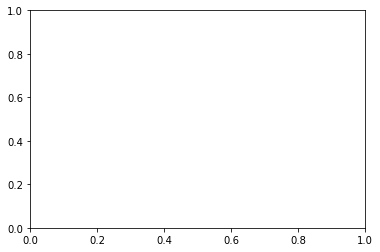

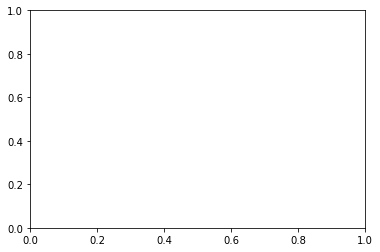

In [54]:
# fig,ax = plt.subplots(1)
# by_boro.plot(
#     kind='scatter',
#     x=by_boro['subgroup'].values, 
#     y=by_boro['BK_FATALITY_RATE'], 
#     #backend='plotly', 
#     width=500,   
# )